<a href="https://colab.research.google.com/github/ben01b/Assignement3/blob/main/knn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

# Task 1 - Train and Evaluate a KNN Classifier on the Connect-4 Dataset

## 1.1 - Import the necessary libraries

In [40]:
# Importing the libraries

# YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 1.2 - Load and pre-process the dataset

In [42]:
data_path = './Data/connect-4.data.txt'
import os
import pwd

column_names = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 
                'b1', 'b2', 'b3', 'b4', 'b5', 'b6',
                'c1', 'c2', 'c3', 'c4', 'c5', 'c6',
                'd1', 'd2', 'd3', 'd4', 'd5', 'd6',
                'e1', 'e2', 'e3', 'e4', 'e5', 'e6',
                'f1', 'f2', 'f3', 'f4', 'f5', 'f6',
                'g1', 'g2', 'g3', 'g4', 'g5', 'g6',
                'class']

# Load the data into a pandas dataframe using the column names defined above
# YOUR CODE HERE

url = 'https://raw.githubusercontent.com/cs-txst/assign-3-knn-ben01b/main/Data/connect-4.data.txt?token=GHSAT0AAAAAAB6ZDRK2A7APA7JPNT6YW7NEY7NMJXQ'

#url = data_path
df_four = pd.read_csv(url)



In [43]:
# Print the shape of the dataframe
# YOUR CODE HERE
print(df_four.shape)

# Show the first 5 rows of the dataframe
# YOUR CODE HERE
print(df_four.head(5))


(67556, 43)
   b b.1 b.2 b.3 b.4 b.5 b.6 b.7 b.8 b.9  ... b.25 b.26 b.27 b.28 b.29 b.30  \
0  b   b   b   b   b   b   b   b   b   b  ...    b    b    b    b    b    b   
1  b   b   b   b   b   b   o   b   b   b  ...    b    b    b    b    b    b   
2  b   b   b   b   b   b   b   b   b   b  ...    b    b    b    b    b    b   
3  o   b   b   b   b   b   b   b   b   b  ...    b    b    b    b    b    b   
4  b   b   b   b   b   b   b   b   b   b  ...    b    b    b    o    b    b   

  b.31 b.32 b.33  win  
0    b    b    b  win  
1    b    b    b  win  
2    b    b    b  win  
3    b    b    b  win  
4    b    b    b  win  

[5 rows x 43 columns]


In [44]:
# Check for null entries
# YOUR CODE HERE
df_four.isnull().values.any()

False

In [45]:
# Check for missing values
# YOUR CODE HERE
df_four.isna().values.any()

False

### Convert the class labels to numerical values
Use the `map` function to convert the class labels to numerical values, similar to what we did in the Iris dataset.

In [46]:
# Converting the class labels to numerical values

label_dict = {
    'win':0,
    'loss':1,
    'draw':2 
    }

# YOUR CODE HERE

#df_four = df_four.applymap(lambda x: transf(x))
#print(df_four)

df_four['ClassLabel'] = df_four['win'].map(label_dict)
df_four.tail()

,b,b.1,b.2,b.3,b.4,b.5,b.6,b.7,b.8,b.9,...,b.26,b.27,b.28,b.29,b.30,b.31,b.32,b.33,win,ClassLabel
67551,x,x,b,b,b,b,o,x,o,b,...,b,b,o,o,x,b,b,b,loss,1
67552,x,x,b,b,b,b,o,b,b,b,...,b,b,o,x,o,o,x,b,draw,2
67553,x,x,b,b,b,b,o,o,b,b,...,b,b,o,x,x,o,b,b,loss,1
67554,x,o,b,b,b,b,o,b,b,b,...,b,b,o,x,o,x,x,b,draw,2
67555,x,o,o,o,x,b,o,b,b,b,...,b,b,x,b,b,b,b,b,draw,2


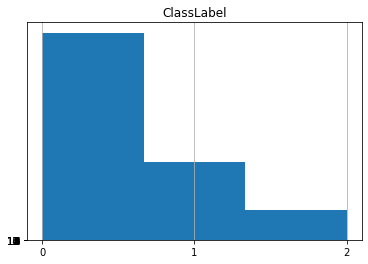

In [47]:
# Show a histogram of the class labels. Use the 'class' column for this. 

# YOUR CODE HERE
df_four.iloc[:,-1:].hist(bins = 3)
plt.yticks(np.arange(0, 15, 1))
plt.xticks(np.arange(0, 3, 1))

plt.show()


### Convert the attributes to numerical values

Use the `applymap` function and a `lambda` function to convert the attributes to numerical values.

In [48]:
# attribute map
attribute_dict = {
    'x':0,
    'o':1,
    'b':2
    }

# YOUR CODE HERE
def transf(x):
  if x == 'x':
    return 0
  elif x == 'o':
    return 1
  elif x == 'b':
    return 2
  elif x == 'win':
    return 0
  elif x == 'loss':
    return 1
  elif x == 'draw':
    return 2
  else:
    return x


df_four = df_four.applymap(lambda x: transf(x))
print(df_four)

       b  b.1  b.2  b.3  b.4  b.5  b.6  b.7  b.8  b.9  ...  b.26  b.27  b.28  \
0      2    2    2    2    2    2    2    2    2    2  ...     2     2     2   
1      2    2    2    2    2    2    1    2    2    2  ...     2     2     2   
2      2    2    2    2    2    2    2    2    2    2  ...     2     2     2   
3      1    2    2    2    2    2    2    2    2    2  ...     2     2     2   
4      2    2    2    2    2    2    2    2    2    2  ...     2     2     1   
...   ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
67551  0    0    2    2    2    2    1    0    1    2  ...     2     2     1   
67552  0    0    2    2    2    2    1    2    2    2  ...     2     2     1   
67553  0    0    2    2    2    2    1    1    2    2  ...     2     2     1   
67554  0    1    2    2    2    2    1    2    2    2  ...     2     2     1   
67555  0    1    1    1    0    2    1    2    2    2  ...     2     2     0   

       b.29  b.30  b.31  b.32  b.33  wi

## 1.3 - Split the dataset into training and testing sets

In [50]:
# Assign the features to a numpy matrix called X and the class labels to a numpy vector called y

# YOUR CODE HERE
#X = df_four.values
#X[:5, :]
X = df_four.to_numpy()
print(X)
y = df_four['ClassLabel']
y[:10]

[[2 2 2 ... 2 0 0]
 [2 2 2 ... 2 0 0]
 [2 2 2 ... 2 0 0]
 ...
 [0 0 2 ... 2 1 1]
 [0 1 2 ... 2 2 2]
 [0 1 1 ... 2 2 2]]


0    0
1    0
2    0
3    0
4    0
5    2
6    0
7    0
8    0
9    0
Name: ClassLabel, dtype: int64

In [51]:
# Split the data into training and test sets. Use 30% of the data for testing and a random state of 42

# YOUR CODE HERE
from sklearn.model_selection import train_test_split
train_ratio = .70

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

#X_train, y_train = X[:105], y[:105]
#X_test, y_test = X[105:], y[105:]

In [53]:
# Print the shapes of the training and test sets

# YOUR CODE HERE
print(x_train.shape)
print(x_train)
print(y_train.shape)
print(y_train)
print(x_test.shape)
print(x_test)
print(y_test.shape)
print(y_test)

(47289, 44)
[[1 1 2 ... 2 0 0]
 [0 1 2 ... 2 2 2]
 [2 2 2 ... 2 0 0]
 ...
 [2 2 2 ... 2 2 2]
 [1 2 2 ... 2 1 1]
 [0 0 0 ... 2 1 1]]
(47289,)
21550    0
65908    2
52736    0
56901    0
27255    0
        ..
64190    1
38054    0
18956    2
6089     1
28715    1
Name: ClassLabel, Length: 47289, dtype: int64
(20267, 44)
[[0 0 1 ... 2 0 0]
 [0 2 2 ... 2 2 2]
 [2 2 2 ... 2 0 0]
 ...
 [0 2 2 ... 2 0 0]
 [1 0 0 ... 2 1 1]
 [0 0 0 ... 2 1 1]]
(20267,)
15313    0
43318    2
57436    0
1520     0
42929    0
        ..
37245    0
51531    1
57671    0
39811    1
63323    1
Name: ClassLabel, Length: 20267, dtype: int64


## 1.4 - Train and evaluate a kNN classifier

Train a kNN classifier using the training set and predict the labels of the test set. Use k=1. Report the accuracy of the classifier.

**Note:** As a distance metric, use the **Hamming** distance metric. Refer to the documentation of the `sklearn.neighbors.KNeighborsClassifier` class. The metric can be specified using the `metric` parameter of the `KNeighborsClassifier`, as `metric='hamming'`.


In [54]:
# Fit the KNN model to the training data

# YOUR CODE HERE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
knn_model = KNeighborsClassifier(n_neighbors=1, metric = 'hamming')
knn_model.fit(x_train, y_train)


KNeighborsClassifier(metric='hamming', n_neighbors=1)

In [55]:
# Evaluate the model on the test data using classification accuracy and report the results.
# Note, this may take some time to run. It takes about 30 seconds on my machine.

# YOUR CODE HERE
y_pred = knn_model.predict(x_test)
num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100
print(f'Test set accuracy: {accuracy:.2f}%')

Test set accuracy: 99.94%


# Task 2 - Fine tune the hyperparameter k of a kNN classifier

### Split the data into training, validation and test sets, using a 60:20:20 split

In [56]:
# Split the data into training, validation and test sets. Use a 60:20:20 split. Use a random state of 42.

# YOUR CODE HERE
from sklearn.model_selection import train_test_split

train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

Print the shape of the training, validation and test sets. Check the numbers to make sure that the split is correct.

In [57]:
# Print the shapes of the training, validation and test sets

# YOUR CODE HERE
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)


(40533, 44)
(40533,)
(13511, 44)
(13511,)
(13512, 44)
(13512,)


### Tune the value of k using the validation set

Tune the value of k using the validation set for values from 1 to 30. Use the Hamming distance metric. Report the accuracy of the classifier on the validation set for each value of k. Plot the accuracy of the classifier on the validation set for each value of k. Report the value of k that gives the best accuracy on the validation set.

In [59]:
# YOUR CODE HERE
best_acc = 0
best_n = 1

for i in range(1, 31):
    knn_model = KNeighborsClassifier(n_neighbors=i, metric = 'hamming')
    knn_model.fit(x_train, y_train)

    y_pred = knn_model.predict(x_test)
    num_correct_predictions = (y_pred == y_test).sum()
    accuracy = (num_correct_predictions / y_test.shape[0]) * 100
    if accuracy > best_acc:
      best_acc = accuracy
      best_n = i
    print(f'Test set accuracy: {accuracy:.2f}%')

print("Best accuracy: ")
print(best_acc)
print("\nBest n: ")
print(best_n)

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_val, y_val)





Test set accuracy: 99.93%
Test set accuracy: 99.78%
Test set accuracy: 99.87%
Test set accuracy: 99.80%
Test set accuracy: 99.84%
Test set accuracy: 99.76%
Test set accuracy: 99.76%
Test set accuracy: 99.75%
Test set accuracy: 99.75%
Test set accuracy: 99.70%
Test set accuracy: 99.70%
Test set accuracy: 99.73%
Test set accuracy: 99.76%
Test set accuracy: 99.72%
Test set accuracy: 99.75%
Test set accuracy: 99.73%
Test set accuracy: 99.76%
Test set accuracy: 99.73%
Test set accuracy: 99.74%
Test set accuracy: 99.76%
Test set accuracy: 99.76%
Test set accuracy: 99.72%
Test set accuracy: 99.76%
Test set accuracy: 99.78%
Test set accuracy: 99.78%
Test set accuracy: 99.77%
Test set accuracy: 99.76%
Test set accuracy: 99.78%
Test set accuracy: 99.78%
Test set accuracy: 99.80%
Best accuracy: 
99.93339253996447

Best n: 
1


KNeighborsClassifier(n_neighbors=1)

### Evaluate the classifier on the test set

Train a kNN classifier using the training set and predict the labels of the test set. Use the value of k that gave the best accuracy on the validation set. Report the accuracy of the classifier on the test set.

Highest accuracy with n=1: 99.933